# Reddit Sentiment Analysis
#### Demonstration on how to create a word cloud and sentiment analysis using the reddit API

In [ ]:
#pip install praw

In [2]:
#pip install wordcloud

In [18]:
import praw
#import credentials
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Create a Reddit account, then go to https://www.reddit.com/prefs/apps . 

In [4]:
reddit = praw.Reddit(client_id='YY8nuWWFe6_ZAmE54tI93Q',
                     client_secret='K7jDivZcfVaswCrOuvt7jZRls6T_oQ',
                     user_agent='msds640')

This subreddit is here: https://www.reddit.com/r/socialjustice101/top/?t=all

In [86]:
subreddit = reddit.subreddit('climatechange').top('all', limit=1000)

C:\Users\matth\AppData\Local\Temp\ipykernel_1272\2092646888.py:1: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  subreddit = reddit.subreddit('climatechange').top('all', limit=1000)


In [87]:
reddit_data = {'title': [],
              'link': [],
              'author': [],
              'n_comments': [],
              'score': [],
              'text': []}


co_subreddit = reddit.subreddit('climatechange').hot(limit=None)

for post in list(co_subreddit):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    
    reddit_data['n_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)
    reddit_data['text'].append(post.selftext)

In [62]:
import pandas as pd

In [63]:
climate_df = pd.DataFrame(reddit_data)

In [64]:
import nltk

fd = nltk.FreqDist(' '.join(climate_df['title']).split())

fd.most_common(20)

[('the', 217),
 ('of', 172),
 ('to', 170),
 ('climate', 135),
 ('in', 132),
 ('and', 114),
 ('a', 105),
 ('Climate', 75),
 ('change', 72),
 ('for', 72),
 ('is', 69),
 ('on', 53),
 ('The', 48),
 ('How', 39),
 ('are', 39),
 ('that', 34),
 ('Change', 34),
 ('by', 32),
 ('from', 30),
 ('What', 28)]

In [65]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
from nltk.corpus import stopwords

stops = stopwords.words('english')

In [67]:
words = ' '.join(climate_df['title']).lower().split()
cleaned_words = [w for w in words if w not in set(stops)]
fd = nltk.FreqDist(' '.join(cleaned_words).split())

In [70]:
cleaned_fd = nltk.FreqDist(cleaned_words)
cleaned_fd.most_common(10)

[('climate', 210),
 ('change', 106),
 ('carbon', 35),
 ('global', 33),
 ('could', 26),
 ('sea', 25),
 ('warming', 24),
 ('change?', 24),
 ('new', 23),
 ('co2', 22)]

# Word Cloud

In [90]:
subreddit = reddit.subreddit('climatechange').top('all', limit=100)

C:\Users\matth\AppData\Local\Temp\ipykernel_1272\2520004515.py:1: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  subreddit = reddit.subreddit('climatechange').top('all', limit=100)


In [92]:
comments_dict = {'title': [],
                'body': []}

for post in subreddit:
    comments_dict['title'].append(post.title)
    comments_dict['body'].append(post.selftext)

(-0.5, 399.5, 199.5, -0.5)

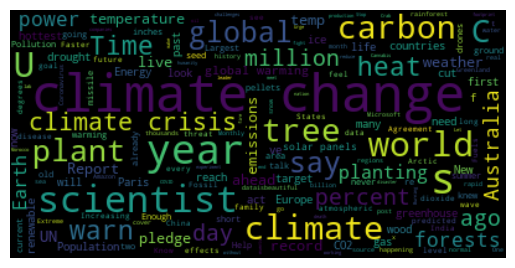

In [93]:
wc = WordCloud().generate(' '.join(comments_dict['title']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')

# Sentiment Analysis

In [7]:
comments_dict = {'title': [],
                'body': []}

for post in subreddit:
    comments_dict['title'].append(post.title)
    comments_dict['body'].append(post.selftext)
    


In [44]:
sentiment_df = pd.read_csv('AFINN-en-165.txt', sep='\t', names=['word', 'score'], index_col='word')
sentiment_dict = sentiment_df.to_dict()['score']

In [47]:
import numpy as np

title_sentiments = []
for title in climate_df['title']:
    words = title.lower().split()
    this_titles_sentiments = []
    for w in words:
        if w in sentiment_dict.keys():
            this_titles_sentiments.append(sentiment_dict[w])
        else:
            this_titles_sentiments.append(0)
            
    
    title_sentiments.append(np.mean(this_titles_sentiments))

In [49]:
climate_df['keyword_sentiment'] = title_sentiments

<Axes: title={'center': 'Reddit Sentiment Anlysis'}, ylabel='Frequency'>

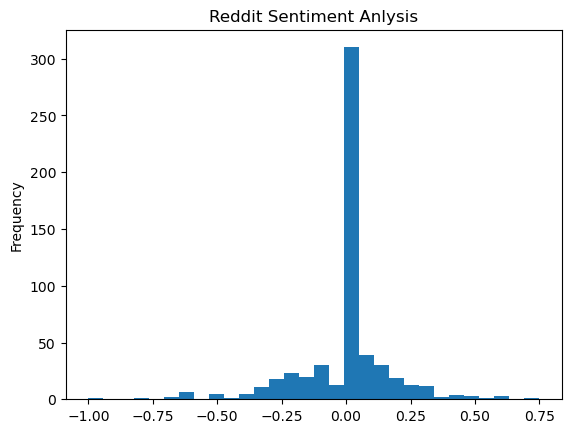

In [60]:

climate_df['keyword_sentiment'].plot.hist(bins=30, title = 'Reddit Sentiment Anlysis')